## Module Coding 

In [1]:
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np

# Exploring
import scipy.stats as stats

# Visualizing
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Default pandas decimal number display format - this kept kicking back a 
# 'Value Error: invalid format specifier' error.
# pd.options.display.float_format = "{:20, .2f}".format

# import acquire
# import summarize
# import prepare

#### The module has 'acquire,' 'summarize,' and 'prepare' modules in place that I don't.  Since in the module's 'acquire' is the MySQL dataset 'get_mall_customer_data,' instead of reading from SQL, I'm going into MySQL and exporting the data to a .csv.  From there, I'll execute the 'pd.read_csv( )' command.

In [2]:
df = pd.read_csv("customers.csv")
df.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
customer_id       200 non-null int64
gender            200 non-null object
age               200 non-null int64
annual_income     200 non-null int64
spending_score    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.describe

<bound method NDFrame.describe of      customer_id  gender  age  annual_income  spending_score
0              1    Male   19             15              39
1              2    Male   21             15              81
2              3  Female   20             16               6
3              4  Female   23             16              77
4              5  Female   31             17              40
..           ...     ...  ...            ...             ...
195          196  Female   35            120              79
196          197  Female   45            126              28
197          198    Male   32            126              74
198          199    Male   32            137              18
199          200    Male   30            137              83

[200 rows x 5 columns]>

In [5]:
df.gender.value_counts()

Female    112
Male       88
Name: gender, dtype: int64

#### Okay, just a quick look at the data (the 'summarize' module they have that I don't includes all this) shows me this set has no null values, and is 200 observations across 5 features.  112 of the people in the sample are women (56%), and 88 are men (44%).

#### Now it's time to prepare our work by filtering columns and missing values

In [6]:
# function to remove columns - add this to our cluster zillow wrangle file

def remove_columns(df, cols_to_remove):
    df = df.drop(columns=cols_to_remove)
    return df

In [7]:
# function to remove rows and columns based on having a minimum percentage
# of values

def handle_missing_values(df, prop_required_column = .5, prop_required_row = .75):
    """
    'prop_required_column = .5' means each column must be at least 50% full of data
    'prop_required_row = .75' means each row must be at least 75% full of data
    If a 'prop' requirement is not met, this function drops that column / row
    """
    threshold = int(round(prop_required_column * len(df.index), 0))
    df.dropna(axis=1, thresh=threshold, inplace=True)
    treshold = int(round(prop_required_row * len(df.columns), 0))
    df.dropna(axis=0, thresh = threshold, inplace = True)
    return df

In [8]:
# Putting the two functions above into one motherfunction:

def data_prep(df, cols_to_remove = [], prop_required_column = .5, prop_required_row = .75):
    df = remove_columns(df, cols_to_remove)
    df = handle_missing_values(df, prop_required_column, prop_required_row)
    return df

# then I would add the data_pre function to the prepare module... which I don't yet have
# df = prepare.data_prep(
#     df, 
#     cols_to_remove = [],
#     prop_required_column = .6, 
#     prop_required_row = .75
#     )

In [9]:
df.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1252ad1d0>,
      dtype=object)

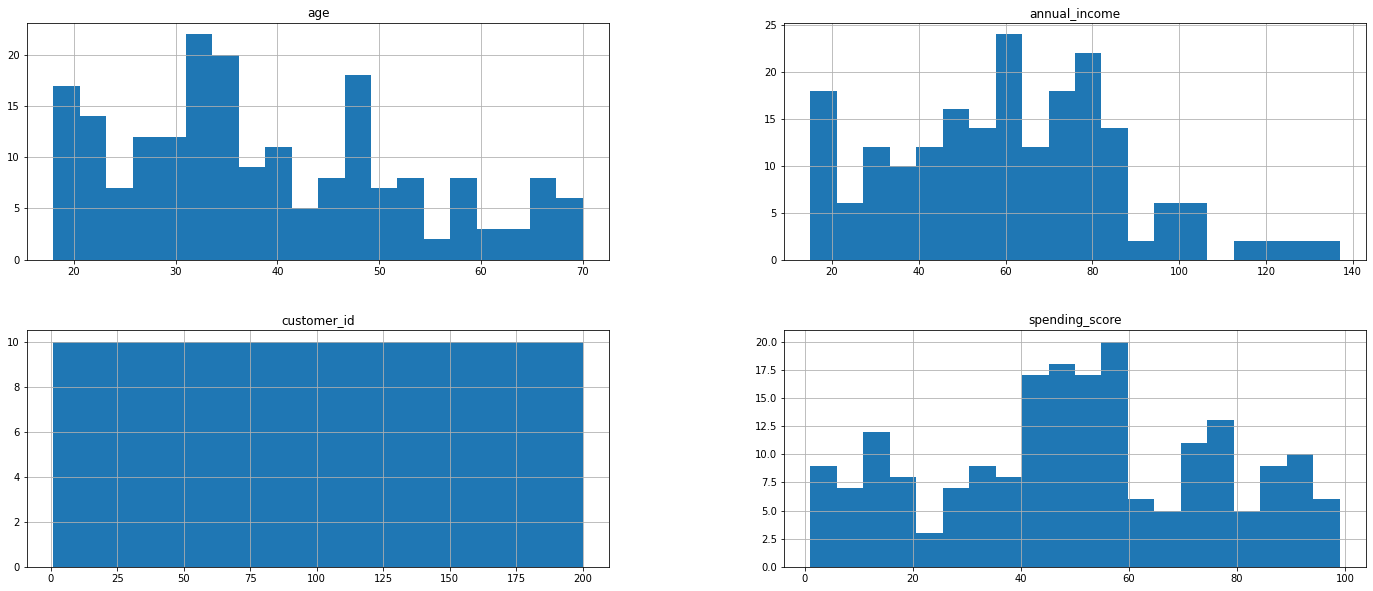

In [10]:
# Visualize the distribution of the data

df.hist(figsize=(24,10), bins = 20)

#### Customer_id plot is all colored because all customer id's are unique (module moved customer_id to index, so this plot is not in workbook).

#### Looking at annual_income, we see some outliers betteen about 107-137K

In [11]:
# # function to get upper outliers (the outliers on the right.  Now outliers on the left,
# # so no need to worry about lower outliers):

# def get_upper_outliers(s, k):
#     """
#     Given a series and a cutoff value, k, this function returns the upper outliers 
#     for the series.
    
#     The values that are returned will be either 0 (saying the point is NOT an outlier), 
#     or a number that indicates how far away from the upperbound the observation is.
#     """
#     q1, q3 = s.quantile([.25, .75])
#     iqr = q3 - q1
#     upper_bound = q3 + k * iqr
#     return s.apply(lambda x: max([x - upper_bound, 0]))

# def add_upper_outlier_columns(df, k):
#     """
#     Adds a column with the suffix '_outliers' for all the numeric columns in the 
#     given dataframe.
    
#     outlier_cols = {col + '_outliers': get_upper_outliers(df[col], k) for 
#          col in df.select_dtypes('number')}
#     return df.assign(**outlier_cols)
#     """
#     for col in df.select_dtypes("number"):
#         df[col + "_outliers"] = get_upper_outliers(df[col], k)
    
#     return df

# add_upper_outlier_columns(df, k=1.5)

def get_upper_outliers(s, k):
    '''
    Given a series and a cutoff value, k, returns the upper outliers for the
    series.

    The values returned will be either 0 (if the point is not an outlier), or a
    number that indicates how far away from the upper bound the observation is.
    '''
    q1, q3 = s.quantile([.25, .75])
    iqr = q3 - q1
    upper_bound = q3 + k * iqr
    return s.apply(lambda x: max([x - upper_bound, 0]))

def add_upper_outlier_columns(df, k):
    """
    Add a column with the suffix _outliers for all the numeric columns
    in the given dataframe.
    """

    for col in df.select_dtypes('number'):
        df[col + '_outliers'] = get_upper_outliers(df[col], k)

    return df

add_upper_outlier_columns(df, k=1.5)

df.head()

,customer_id,gender,age,annual_income,spending_score,customer_id_outliers,age_outliers,annual_income_outliers,spending_score_outliers
0,1,Male,19,15,39,0,0,0.0,0
1,2,Male,21,15,81,0,0,0.0,0
2,3,Female,20,16,6,0,0,0.0,0
3,4,Female,23,16,77,0,0,0.0,0
4,5,Female,31,17,40,0,0,0.0,0


In [12]:
outlier_cols = [col for col in df if col.endswith("_outliers")]
for col in outlier_cols:
    print("~~~\n" + col)
    data = df[col][df[col] > 0]
    print(data.describe())

~~~
customer_id_outliers
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: customer_id_outliers, dtype: float64
~~~
age_outliers
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: age_outliers, dtype: float64
~~~
annual_income_outliers
count    2.00
mean     4.25
std      0.00
min      4.25
25%      4.25
50%      4.25
75%      4.25
max      4.25
Name: annual_income_outliers, dtype: float64
~~~
spending_score_outliers
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: spending_score_outliers, dtype: float64


### Exercises

#### Acquire data from mySQL using the python module to connect and query. You will want to end with a single dataframe. Make sure to include: the logerror, all fields related to the properties that are available. You will end up using all the tables in the database.

Be sure to do the correct join (inner, outer, etc.). We do not want to eliminate properties purely because they may have a null value for airconditioningtypeid.
Only include properties with a transaction in 2017, and include only the last transaction for each properity (so no duplicate property ID's), along with zestimate error and date of transaction.
Only include properties that include a latitude and longitude value.

In [13]:
import env
import zillow_acquire

In [14]:
df = zillow_acquire.get_zillow_data_from_sql()

df.head()

,parcelid,id,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,transactiondate
0,10711855,1087254,NaN,NaN,NaN,2.0,3.0,NaN,8.0,2.0,...,NaN,249655.0,624139.0,2016.0,374484.0,7659.36,None,NaN,6.037113e+13,2017-07-07
1,10711877,1072280,1.0,NaN,NaN,2.0,4.0,NaN,8.0,2.0,...,NaN,253000.0,660000.0,2016.0,407000.0,8123.91,None,NaN,6.037113e+13,2017-08-29
2,10711888,1340933,1.0,NaN,NaN,2.0,4.0,NaN,8.0,2.0,...,NaN,257591.0,542923.0,2016.0,285332.0,6673.24,None,NaN,6.037113e+13,2017-04-04
3,10711910,1878109,NaN,NaN,NaN,2.0,3.0,NaN,8.0,2.0,...,NaN,57968.0,78031.0,2016.0,20063.0,1116.46,None,NaN,6.037113e+13,2017-03-17
4,10711923,2190858,NaN,NaN,NaN,2.0,4.0,NaN,8.0,2.0,...,NaN,167869.0,415459.0,2016.0,247590.0,5239.85,None,NaN,6.037113e+13,2017-03-24


In [17]:
df.info

<bound method DataFrame.info of         parcelid       id  airconditioningtypeid  architecturalstyletypeid  \
0       10711855  1087254                    NaN                       NaN   
1       10711877  1072280                    1.0                       NaN   
2       10711888  1340933                    1.0                       NaN   
3       10711910  1878109                    NaN                       NaN   
4       10711923  2190858                    NaN                       NaN   
...          ...      ...                    ...                       ...   
77409  167686999   775695                    NaN                       NaN   
77410  167687739  2863262                    NaN                       NaN   
77411  167687839  1372384                    NaN                       NaN   
77412  167688532  2758757                    1.0                       NaN   
77413  167689317  2535331                    NaN                       NaN   

       basementsqft  bathroomcn

In [16]:
df.columns

Index(['parcelid', 'id', 'airconditioningtypeid', 'architecturalstyletypeid',
       'basementsqft', 'bathroomcnt', 'bedroomcnt', 'buildingclasstypeid',
       'buildingqualitytypeid', 'calculatedbathnbr', 'decktypeid',
       'finishedfloor1squarefeet', 'calculatedfinishedsquarefeet',
       'finishedsquarefeet12', 'finishedsquarefeet13', 'finishedsquarefeet15',
       'finishedsquarefeet50', 'finishedsquarefeet6', 'fips', 'fireplacecnt',
       'fullbathcnt', 'garagecarcnt', 'garagetotalsqft', 'hashottuborspa',
       'heatingorsystemtypeid', 'latitude', 'longitude', 'lotsizesquarefeet',
       'poolcnt', 'poolsizesum', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7',
       'propertycountylandusecode', 'propertylandusetypeid',
       'propertyzoningdesc', 'rawcensustractandblock', 'regionidcity',
       'regionidcounty', 'regionidneighborhood', 'regionidzip', 'roomcnt',
       'storytypeid', 'threequarterbathnbr', 'typeconstructiontypeid',
       'unitcnt', 'yardbuildingsqft17', 'yardb

In [18]:
# gives me the number of non-missing values for each column / row

df.count()

parcelid                        77414
id                              77414
airconditioningtypeid           24953
architecturalstyletypeid          206
basementsqft                       50
bathroomcnt                     77381
bedroomcnt                      77381
buildingclasstypeid                15
buildingqualitytypeid           49672
calculatedbathnbr               76772
decktypeid                        614
finishedfloor1squarefeet         6023
calculatedfinishedsquarefeet    77185
finishedsquarefeet12            73749
finishedsquarefeet13               41
finishedsquarefeet15             3009
finishedsquarefeet50             6023
finishedsquarefeet6               386
fips                            77381
fireplacecnt                     8276
fullbathcnt                     76772
garagecarcnt                    25474
garagetotalsqft                 25474
hashottuborspa                   1538
heatingorsystemtypeid           49440
latitude                        77381
longitude   

#### .count ( ) gives me back a Series that I can work with.  Can't work with .info( ) b/c its value is 'None':

In [21]:
info_return = df.info()
count_return = df.count()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77414 entries, 0 to 77413
Data columns (total 60 columns):
parcelid                        77414 non-null int64
id                              77414 non-null int64
airconditioningtypeid           24953 non-null float64
architecturalstyletypeid        206 non-null float64
basementsqft                    50 non-null float64
bathroomcnt                     77381 non-null float64
bedroomcnt                      77381 non-null float64
buildingclasstypeid             15 non-null float64
buildingqualitytypeid           49672 non-null float64
calculatedbathnbr               76772 non-null float64
decktypeid                      614 non-null float64
finishedfloor1squarefeet        6023 non-null float64
calculatedfinishedsquarefeet    77185 non-null float64
finishedsquarefeet12            73749 non-null float64
finishedsquarefeet13            41 non-null float64
finishedsquarefeet15            3009 non-null float64
finishedsquarefeet50          

In [22]:
type(info_return)

NoneType

In [23]:
type(count_return)

pandas.core.series.Series

#### Now tell pandas to label 'True' where there's missing values, and 'False' where there are no missing values

In [25]:
data_missing = df.isna()
data_missing.head()

,parcelid,id,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,transactiondate
0,False,False,True,True,True,False,False,True,False,False,...,True,False,False,False,False,False,True,True,False,False
1,False,False,False,True,True,False,False,True,False,False,...,True,False,False,False,False,False,True,True,False,False
2,False,False,False,True,True,False,False,True,False,False,...,True,False,False,False,False,False,True,True,False,False
3,False,False,True,True,True,False,False,True,False,False,...,True,False,False,False,False,False,True,True,False,False
4,False,False,True,True,True,False,False,True,False,False,...,True,False,False,False,False,False,True,True,False,False


#### Now make sure that all columns are of boolean types:

In [26]:
data_missing.dtypes

parcelid                        bool
id                              bool
airconditioningtypeid           bool
architecturalstyletypeid        bool
basementsqft                    bool
bathroomcnt                     bool
bedroomcnt                      bool
buildingclasstypeid             bool
buildingqualitytypeid           bool
calculatedbathnbr               bool
decktypeid                      bool
finishedfloor1squarefeet        bool
calculatedfinishedsquarefeet    bool
finishedsquarefeet12            bool
finishedsquarefeet13            bool
finishedsquarefeet15            bool
finishedsquarefeet50            bool
finishedsquarefeet6             bool
fips                            bool
fireplacecnt                    bool
fullbathcnt                     bool
garagecarcnt                    bool
garagetotalsqft                 bool
hashottuborspa                  bool
heatingorsystemtypeid           bool
latitude                        bool
longitude                       bool
l

#### Checks out.  Now we have to tell pandas to sum the 'Trues' (ones):

In [27]:
data_num_missing = data_missing.sum()
data_num_missing

parcelid                            0
id                                  0
airconditioningtypeid           52461
architecturalstyletypeid        77208
basementsqft                    77364
bathroomcnt                        33
bedroomcnt                         33
buildingclasstypeid             77399
buildingqualitytypeid           27742
calculatedbathnbr                 642
decktypeid                      76800
finishedfloor1squarefeet        71391
calculatedfinishedsquarefeet      229
finishedsquarefeet12             3665
finishedsquarefeet13            77373
finishedsquarefeet15            74405
finishedsquarefeet50            71391
finishedsquarefeet6             77028
fips                               33
fireplacecnt                    69138
fullbathcnt                       642
garagecarcnt                    51940
garagetotalsqft                 51940
hashottuborspa                  75876
heatingorsystemtypeid           27974
latitude                           33
longitude   

#### The numbers on the right are the total number of missing values in each column

#### Now, to turn these values into percentages:

In [28]:
len(df)

77414

In [29]:
perc_missing = data_num_missing / len(df)
perc_missing

parcelid                        0.000000
id                              0.000000
airconditioningtypeid           0.677668
architecturalstyletypeid        0.997339
basementsqft                    0.999354
bathroomcnt                     0.000426
bedroomcnt                      0.000426
buildingclasstypeid             0.999806
buildingqualitytypeid           0.358359
calculatedbathnbr               0.008293
decktypeid                      0.992069
finishedfloor1squarefeet        0.922198
calculatedfinishedsquarefeet    0.002958
finishedsquarefeet12            0.047343
finishedsquarefeet13            0.999470
finishedsquarefeet15            0.961131
finishedsquarefeet50            0.922198
finishedsquarefeet6             0.995014
fips                            0.000426
fireplacecnt                    0.893094
fullbathcnt                     0.008293
garagecarcnt                    0.670938
garagetotalsqft                 0.670938
hashottuborspa                  0.980133
heatingorsystemt

In [ ]:
new_df = 

In [22]:
df2 = df.dropna(subset=["longitude", "latitude"])

In [23]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77381 entries, 0 to 77413
Data columns (total 60 columns):
parcelid                        77381 non-null int64
id                              77381 non-null int64
airconditioningtypeid           24953 non-null float64
architecturalstyletypeid        206 non-null float64
basementsqft                    50 non-null float64
bathroomcnt                     77381 non-null float64
bedroomcnt                      77381 non-null float64
buildingclasstypeid             15 non-null float64
buildingqualitytypeid           49672 non-null float64
calculatedbathnbr               76772 non-null float64
decktypeid                      614 non-null float64
finishedfloor1squarefeet        6023 non-null float64
calculatedfinishedsquarefeet    77185 non-null float64
finishedsquarefeet12            73749 non-null float64
finishedsquarefeet13            41 non-null float64
finishedsquarefeet15            3009 non-null float64
finishedsquarefeet50          

In [24]:
df2.describe

<bound method NDFrame.describe of         parcelid       id  airconditioningtypeid  architecturalstyletypeid  \
0       10711855  1087254                    NaN                       NaN   
1       10711877  1072280                    1.0                       NaN   
2       10711888  1340933                    1.0                       NaN   
3       10711910  1878109                    NaN                       NaN   
4       10711923  2190858                    NaN                       NaN   
...          ...      ...                    ...                       ...   
77409  167686999   775695                    NaN                       NaN   
77410  167687739  2863262                    NaN                       NaN   
77411  167687839  1372384                    NaN                       NaN   
77412  167688532  2758757                    1.0                       NaN   
77413  167689317  2535331                    NaN                       NaN   

       basementsqft  bathroom

In [ ]:
# write this function and run it to see takeaways and how I want 
# to handle missing values

def big_mother(df):
    """
    function to take in a df of observations and attributes and returns another df
    where each row is an attribute name, the first column is the number of rows 
    with missing values for that attribute, and the second column is the percent of
    total rows that have missing values for that attribute.  
    """
    df = df.T
    